#   SELF DRIVING CAR - UDACITY CAPSTONE PROJECT

#### In this project the aim is build a deep learning model using Keras to create a simulation for self driving car.The model should be able to accurately predict the steering angles by using the image of the road infront of the car as input. The model should be able to take a turn accurately depending upon the curvature of the road.

In [2]:
# import all the necessary modules 
import numpy as np
import pandas as pd


**The next step is to import the dataset.The dataset consistes of about 45,000 images captured by the camer while the car was driven.It also includes a text file containing the image number and the steering angle recorded for that particular image depending upon the curvature of the road.**

In [3]:
# define the path to the dataset  consisting of the images
pi = 3.14159265
path = r"driving_dataset/data.txt"

In [4]:
# while importing the data we convert the value of degree to radians by multiplying it with (180/pi)
x=[]
y=[]

with open(path,'r') as f:
 for value in f:
  x.append('driving_dataset/'+value.strip().split()[0])
  y.append(round(float(value.strip().split()[1]) *(pi/180), 8 ))
    

In [5]:
# visualize  first 10 items in x
x[:10]

['driving_dataset/0.jpg',
 'driving_dataset/1.jpg',
 'driving_dataset/2.jpg',
 'driving_dataset/3.jpg',
 'driving_dataset/4.jpg',
 'driving_dataset/5.jpg',
 'driving_dataset/6.jpg',
 'driving_dataset/7.jpg',
 'driving_dataset/8.jpg',
 'driving_dataset/9.jpg']

In [6]:
# visualize  first 10 steering angles in y
y[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [7]:
#  now we divide the data into training and testing sets with 20% of data going  into test set.However in this case we cannot 
#  split the data randomly and we need to follow the same order
split_index= int(len(x)*0.8)

**We split the data into training and testing set using the split index.**

In [8]:
x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

**Print the number of training Examples.**

In [9]:
# number of exaples in train set
len(x_train)

36324

**Print the number of Train labels.**

In [10]:
# number of exaples in train set
len(y_train)

36324

**Print the number of test Examples.**

In [11]:
# number of exaples in test set
len(x_test)

9082

**Print the number of test labels.**

In [12]:
# number of exaples in test set
len(y_test)


9082

**So the given data has been effectively divided into training and test data with 80% of the data going into training and the remaining 20% of the data going into the test set .We the train can clearly see that the train set has 36,324 examples and the test set has 9082 examples.**

#### We then perform some exploratory data analysis to find the range anf frequency ditribution of our sterring angles.The best way to visualize a frequency distribution is by plotting a histogram

In [13]:
# import matplotlib
import matplotlib.pyplot as plt


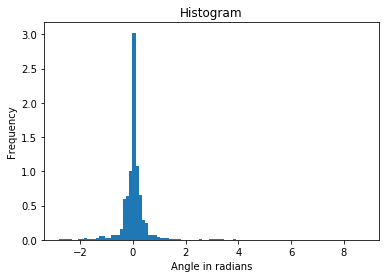

In [14]:
# plot histogram using values of steering angles.
plt.hist(y ,normed=True, bins=100)
plt.xlabel("Angle in radians")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

#  Next we need to create the Neural Network model and train the network on the training set.

<img src = "cnnn.JPG">

**The above architecture was designed by Nvidia specially for training model for self driving cars.Its an very effecient model which was designed and the best part is the CNN Performs extremely well inspite of having no pooling or dropout layers .**

In [15]:
# import all the necessary libraries for building the model using keras

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

C:\Users\ts111\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
model = Sequential()
model.add(Conv2D(filters =24 , kernel_size =5, strides =2 ,padding = 'valid' ,activation = 'relu' , input_shape=(66,200,3)))
model.add(Conv2D(filters =36 , kernel_size =5 , strides =2 ,padding ='valid' ,activation = 'relu' ))
model.add(Conv2D(filters =48 , kernel_size =5 ,strides =2 ,padding = 'valid' ,activation = 'relu' ))
model.add(Conv2D(filters =64 , kernel_size =3 ,strides =1 ,padding = 'valid' ,activation = 'relu' ))
model.add(Conv2D(filters =64 , kernel_size =3 ,strides =1 ,padding = 'valid' ,activation = 'relu' ))
model.add(Flatten())
model.add(Dense(1164 ,activation ='relu'))
model.add(Dense(100 ,activation ='relu'))
model.add(Dense(50 ,activation ='relu'))
model.add(Dense(10 ,activation ='relu'))
model.add(Dense(1 ,activation ='tanh'))


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1164)              1342092   
__________

**The next important step is to convert the images into tensors so that it can be fed as an input to the neural network .Out x_train consists of a list where each element of the list is a string consisting of the image path.We need to write a function that gets the image from the path and the converts the image to an appropriate dimension so that it can be effectively fed to the neural network.**

In [ ]:
from keras.preprocessing import image                  
from tqdm import tqdm
def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(66, 200))
    # convert PIL.Image.Image type to 3D tensor with shape (66, 200, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)
def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
train_tensors = paths_to_tensor(x_train[0:18000]).astype('float32')/255

In [ ]:
test_tensors = paths_to_tensor(x_test).astype('float32')/255

 Finally we use Adam as the optimizer and because we need to find the deviation between the predicted value and the true value we use mean squared error as the accuracy metric.

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='mean_squared_error', metrics=['mse'])

In [ ]:
from keras.callbacks import ModelCheckpoint  


epochs = 50

checkpointer = ModelCheckpoint(filepath='saved_model_new/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

histor =model.fit(train_tensors, y_train[:18000], 
          validation_data=(test_tensors, y_test),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)
plt.plot(histor.history['mean_squared_error'])


In [ ]:
# plotting the mean squared error with for 20 epochs
# this result was obtained when initially the model was run for 20 epochs
plt.plot(histor.history['mean_squared_error'])
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

In [ ]:
# mean squared error after 50 epochs
plt.plot(histor.history['mean_squared_error'])
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

In [ ]:
model.load_weights('saved_model_new/weights.best.from_scratch.hdf5')

Let us visualize the predictions of the first ten angles

In [ ]:
angle_predictions = [(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]



In [ ]:
angle_predictions[0:10]

Finally we visualize our model using openCV2 module. First each of the image in the dataset is displayed along with the actual rotation of the steering wheel based on the prediction angle.

In [ ]:

import scipy.misc
import cv2
from subprocess import call
from keras.preprocessing import image  

img = cv2.imread('ferrari.jpg',0)
rows,cols = img.shape

smoothed_angle = 0
# starting from the 100 image
i = 150
while(cv2.waitKey(10) != ord('x') ):
    real_image = scipy.misc.imread("driving_dataset/" + str(i) + ".jpg", mode="RGB")
    fulll_image = image.img_to_array(image.load_img('driving_dataset/'+str(i)+ '.jpg',target_size=(66, 200)))
    images = np.expand_dims(fulll_image, axis=0) / 255.0
    degrees = model.predict(images)[0] *(180.0 / scipy.pi)
    call("clear")
    print("The Predicted steering angle is: " + str(degrees) + " degrees")
    cv2.imshow("frame", cv2.cvtColor(real_image, cv2.COLOR_RGB2BGR))
    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("Steering Wheel", dst)
    i += 1

In [ ]:
cv2.destroyAllWindows()

In [ ]:
2+2